# Study kasus analisis data sales

In [1]:
import pandas as pd
import os
import glob
os.chdir("./data_analis")

### Gabung 12 laporan file ke 1 laporan

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "data_setahun.csv", index=False, encoding='utf-8-sig')

KeyboardInterrupt: 

In [3]:
df = pd.read_csv('./Sales_January_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
##baca data yang sudah jadi setahun    
data_setahun = pd.read_csv('./data_setahun.csv')

print(data_setahun['Product'])

C:\Users\yazid\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0                USB-C Charging Cable
1          Bose SoundSport Headphones
2                        Google Phone
3                    Wired Headphones
4                    Wired Headphones
                      ...            
1144555               Vareebadd Phone
1144556        AAA Batteries (4-pack)
1144557      Apple Airpods Headphones
1144558        27in 4K Gaming Monitor
1144559    Bose SoundSport Headphones
Name: Product, Length: 1144560, dtype: object


### Menambah data dengan menambah kolom

In [5]:
#tambah kolom bulan
data_setahun['Month'] = data_setahun['Order Date'].str[0:2]
data_setahun.tail(100)
data_setahun.iloc[0:4]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99


### Cleaning Data

In [6]:
nan_df = data_setahun[data_setahun.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
743800,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,NaN
743801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743802,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,NaN
743803,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,NaN
743804,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,NaN


In [7]:
#menghapus NaN data
data_setahun = data_setahun.dropna(how = 'all')
data_setahun.head(520)

#menghapus or di month

data_setahun_temp = data_setahun[data_setahun['Order Date'].str[0:2] == 'Or']
data_setahun_temp.head(520)

data_setahun = data_setahun[data_setahun['Order Date'].str[0:2] != 'Or']
data_setahun.head(520)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
515,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215",04,11.99
516,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301",04,150.00
517,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301",04,14.95
518,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016",04,300.00


In [8]:
data_setahun['Quantity Ordered'] = pd.to_numeric(data_setahun['Quantity Ordered'])

data_setahun['Quantity Ordered'].dtypes
data_setahun['Price Each'] = pd.to_numeric(data_setahun['Price Each'])

data_setahun['Price Each'].dtypes

dtype('float64')

In [9]:
##tambah kolom sales
data_setahun['sales'] = data_setahun['Quantity Ordered'] * data_setahun['Price Each']
data_setahun.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04,11.95
6,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04,99.99
7,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04,11.95
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04,1700.00
9,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04,11.99


In [10]:
data = data_setahun.to_csv('./data_laporan_tahunan.csv',index = False)

### Tambah kolom kota

In [14]:
#menggunakan apply()

#bikin fungsi tambah kota
def tambah_kota(address):
    return address.split(',')[1]

def tambah_negara(address):
    return address.split(',')[2].split(' ')[1]
#membuat kolom kota
data['City'] = data['Purchase Address'].apply(lambda x: tambah_kota(x) + ' ('+tambah_negara(x) +')')

#data = data.drop(columns = 'city')

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Pertanyaan 1 :  Bulan apa dengan pendapatan terbaik? berapa yang didapat pada bulan itu

In [11]:
data = pd.read_csv('./data_laporan_tahunan.csv')
data.head()

data_per_bulan = data.groupby('Month').sum()
print(data_per_bulan['sales'])

Month
1     1.093354e+07
2     1.321213e+07
3     1.684260e+07
4     2.372952e+07
5     1.892620e+07
6     1.546681e+07
7     1.588665e+07
8     1.506878e+07
9     1.258709e+07
10    2.242036e+07
11    1.919762e+07
12    2.768066e+07
Name: sales, dtype: float64


In [12]:
import matplotlib.pyplot as plt

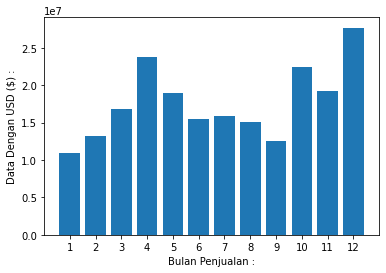

In [13]:
bulan = range(1,13)
plt.bar(bulan,data_per_bulan['sales'])
plt.xticks(bulan)
plt.ylabel('Data Dengan USD ($) :')
plt.xlabel('Bulan Penjualan :')
plt.show()


### Pertanyaan 2 : kota mana dengan penjualan terbanyak

In [ ]:
data_per_kota = data.groupby(['City']).sum()
data_per_kota.columns

In [ ]:
kota = data['City'].unique()
plt.bar(kota,data_per_kota['sales'])
plt.xticks(kota,rotation = 'vertical',size = 8)
plt.ylabel('Data Dengan USD ($) :')
plt.xlabel('Kota:')
plt.show()

###  Pertanyaan ke 3 : Jam berapa harus di tampilkan iklan untuk meningkatkan pembelian

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [ ]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data.head()

In [ ]:
hours = [hour for hour,df in data.groupby('Hour')]
plt.plot(hours,data.groupby('Hour').count())
plt.xticks(hours)
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Jam Order')
plt.grid()
plt.show()

### Pertanyaan ke 4 : product apa yang sering terjual berbarengan 

In [36]:
df = data[data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df = df[['Order Id''Grouped']].drop_duplicates()
df.head(20)

KeyError: "None of [Index(['Order IdGrouped'], dtype='object')] are in the [columns]"

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))


for key,value in count.most_common(10):
    print(key,value)

### Pertanyaan ke 5 : produk apa yang paling banyak terjual.? Dan mengapa bisa terjual banyak .?  

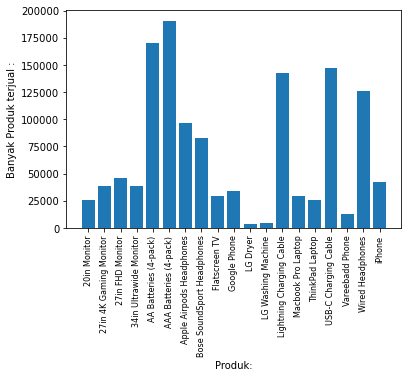

In [15]:
product_group = data.groupby('Product')
banyak_barang_terjual = product_group.sum()['Quantity Ordered']

products = [produk for produk,df in product_group]

plt.bar(products,banyak_barang_terjual)
plt.xticks(products,rotation = 'vertical',size = 8)
plt.ylabel('Banyak Produk terjual :')
plt.xlabel('Produk:')
plt.show()

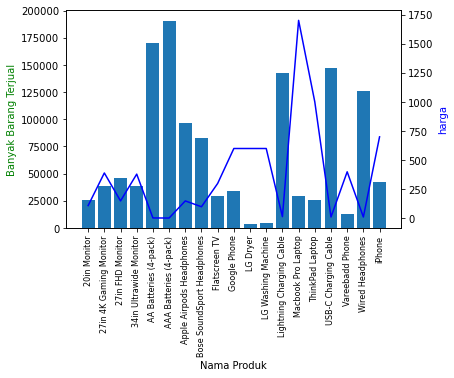

In [34]:
price = data.groupby('Product').mean()['Price Each']
flg,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,banyak_barang_terjual)
ax2.plot(products,price,'b-')
ax1.set_xlabel('Nama Produk')
ax1.set_ylabel('Banyak Barang Terjual',color = 'g')
ax2.set_ylabel('harga',color = 'b')
ax1.set_xticklabels(products,rotation = 'vertical',size = 8)
plt.show()
